In [577]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [578]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')
pruebas_df = pd.read_csv('setDeDatos/nlp-getting-started/test.csv')
muestras_df = pd.read_csv('setDeDatos/nlp-getting-started/sample_submission.csv')


In [579]:
entrenamiento_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [580]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [581]:
entrenamiento_df['keyword'].value_counts().head(10)

fatalities     45
armageddon     42
deluge         42
body%20bags    41
harm           41
sinking        41
damage         41
fear           40
evacuate       40
twister        40
Name: keyword, dtype: int64

In [582]:
entrenamiento_df['location'].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [583]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [584]:
entrenamiento_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [585]:
pruebas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.0+ KB


In [586]:
pruebas_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [587]:
pruebas_df['location'].value_counts().head(10)

New York          38
USA               37
Worldwide         16
United States     15
Canada            13
London            13
Kenya             12
Nigeria           12
United Kingdom    12
India             11
Name: location, dtype: int64

In [588]:
pruebas_df['keyword'].value_counts().head(10)

deluged               23
rubble                22
demolished            22
first%20responders    21
annihilation          21
sirens                21
snowstorm             21
obliteration          21
seismic               21
avalanche             20
Name: keyword, dtype: int64

In [589]:
muestras_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
id        3263 non-null int64
target    3263 non-null int64
dtypes: int64(2)
memory usage: 51.1 KB


In [590]:
muestras_df.tail(10)

,id,target
3253,10838,0
3254,10845,0
3255,10856,0
3256,10857,0
3257,10858,0
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0
3262,10875,0


In [591]:
muestras_df['target'].value_counts()

0    3263
Name: target, dtype: int64

In [592]:
# Hago un merge de muestras_df y pruebas_df por el campo 'id'
merge_muestras_pruebas_df = pd.merge(muestras_df,pruebas_df, on='id')
merge_muestras_pruebas_df = merge_muestras_pruebas_df.reset_index()
# acomodo las columnas
merge_muestras_pruebas_df = merge_muestras_pruebas_df[['id', 'keyword', 'location', 'text','target']]
merge_muestras_pruebas_df.tail(10)

,id,keyword,location,text,target
3253,10838,NaN,NaN,Malaysian PM confirms debris is from missing f...,0
3254,10845,NaN,NaN,Officials: Alabama home quarantined over possi...,0
3255,10856,NaN,NaN,See the 16yr old PKK suicide bomber who detona...,0
3256,10857,NaN,NaN,To conference attendees! The blue line from th...,0
3257,10858,NaN,NaN,The death toll in a #IS-suicide car bombing on...,0
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,0
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,0


In [593]:
merge_muestras_pruebas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
target      3263 non-null int64
dtypes: int64(2), object(3)
memory usage: 127.5+ KB


In [594]:
# hago una concatenación con entrenamiento_df y merge_muestras_pruebas_df 
entrenamiento_df_merge = pd.concat([entrenamiento_df,merge_muestras_pruebas_df], axis=0)
entrenamiento_df_merge = entrenamiento_df_merge.reset_index()
entrenamiento_df_merge

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [595]:
entrenamiento_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 6 columns):
index       10876 non-null int64
id          10876 non-null int64
keyword     10789 non-null object
location    7238 non-null object
text        10876 non-null object
target      10876 non-null int64
dtypes: int64(3), object(3)
memory usage: 509.9+ KB


In [596]:
entrenamiento_df_merge['keyword'].value_counts()

bioterror                50
injured                  50
catastrophic             50
collided                 50
crash                    50
emergency%20plan         50
crush                    50
deaths                   50
fatality                 50
casualties               50
hijacking                50
danger                   50
terrorist                50
upheaval                 50
demolish                 50
panicking                50
natural%20disaster       50
hazard                   50
sunk                     50
drought                  50
outbreak                 50
injury                   50
fire%20truck             50
electrocute              50
sinkhole                 50
attack                   50
screams                  50
tsunami                  50
nuclear%20disaster       50
buildings%20on%20fire    50
                         ..
terrorism                50
catastrophe              50
nuclear%20reactor        50
refugees                 50
engulfed            

In [597]:
entrenamiento_df_merge['target'].value_counts()

0    7605
1    3271
Name: target, dtype: int64

In [598]:
# Quito la columna 'text' y la reemplazo por la columna  
# 'longitud_text' que contiene la longitud de la columna 'text'. 
entrenamiento_df_merge['text']=entrenamiento_df_merge['text'].astype(str)
entrenamiento_df_merge['longitud_text']=entrenamiento_df_merge.text.str.len()
entrenamiento_df_merge=entrenamiento_df_merge[['id','keyword','location','target','longitud_text']]
entrenamiento_df_merge


,id,keyword,location,target,longitud_text
0,1,NaN,NaN,1,69
1,4,NaN,NaN,1,38
2,5,NaN,NaN,1,133
3,6,NaN,NaN,1,65
4,7,NaN,NaN,1,88
5,8,NaN,NaN,1,110
6,10,NaN,NaN,1,95
7,13,NaN,NaN,1,59
8,14,NaN,NaN,1,79
9,15,NaN,NaN,1,52


In [599]:
# long máxima, mínima, promedio, 
    
keyword_grouped = entrenamiento_df_merge.loc[:,['keyword','longitud_text']].groupby('keyword')\
                    .agg(['mean','count'])
keyword_grouped


longitud_text      
                             mean count
keyword                                
ablaze                  95.280000    50
accident               102.980000    50
aftershock             100.900000    50
airplane%20accident    108.520000    50
ambulance               99.540000    50
annihilated            103.020000    50
annihilation           118.200000    50
apocalypse              99.720000    50
armageddon              99.100000    50
army                   105.280000    50
arson                   99.120000    50
arsonist                79.980000    50
attack                 100.440000    50
attacked               108.720000    50
avalanche              100.640000    50
battle                 101.909091    33
bioterror              114.200000    50
bioterrorism           110.020000    50
blaze                   77.660000    50
blazing                 97.660000    50
bleeding                79.320000    50
blew%20up               78.220000    50
blight                  95.760000    50
blizzard                73.640000    50
blood                   82.360000    50
bloody                  88.060000    50
blown%20up             102.260000    50
body%20bag             124.260000    50
body%20bagging          91.440000    50
body%20bags            103.160000    50
...                           ...   ...
survivors              106.860000    50
terrorism              106.580000    50
terrorist              108.360000    50
threat                 102.312500    16
thunder                 74.480000    50
thunderstorm           107.100000    50
tornado                 94.340000    50
tragedy                113.660000    50
trapped                105.320000    50
trauma                 113.300000    50
traumatised             89.740000    50
trouble                 95.700000    50
tsunami                 86.940000    50
twister                 93.960000    50
typhoon                112.180000    50
upheaval               106.240000    50
violent%20storm        114.840000    50
volcano                103.785714    42
war%20zone              85.828571    35
weapon                  91.840000    50
weapons                114.100000    50
whirlwind              100.560000    50
wild%20fires           103.660000    50
wildfire               104.040000    50
windstorm              101.980000    50
wounded                108.560000    50
wounds                 103.740000    50
wreck                   89.820000    50
wreckage               120.360000    50
wrecked                 81.680000    50

[221 rows x 2 columns]

In [600]:
# acomodo las columnas
level0 = keyword_grouped.columns.get_level_values(0)
level1 = keyword_grouped.columns.get_level_values(1)

keyword_grouped.columns= level0 + '_' + level1
keyword_grouped =keyword_grouped.reset_index()
keyword_grouped

,keyword,longitud_text_mean,longitud_text_count
0,ablaze,95.280000,50
1,accident,102.980000,50
2,aftershock,100.900000,50
3,airplane%20accident,108.520000,50
4,ambulance,99.540000,50
5,annihilated,103.020000,50
6,annihilation,118.200000,50
7,apocalypse,99.720000,50
8,armageddon,99.100000,50
9,army,105.280000,50


In [609]:
# hago un merge de keyword_grouped y entrenamiento_df_merge por 'keyword'
merge_keyword_group_entrenamiento = pd.merge(keyword_grouped,entrenamiento_df_merge, on='keyword')
merge_keyword_group_entrenamiento = merge_keyword_group_entrenamiento.reset_index()
merge_keyword_group_entrenamiento


,index,keyword,longitud_text_mean,longitud_text_count,id,location,target,longitud_text
0,0,ablaze,95.28,50,48,Birmingham,1,55
1,1,ablaze,95.28,50,49,Est. September 2012 - Bristol,0,67
2,2,ablaze,95.28,50,50,AFRICA,1,82
3,3,ablaze,95.28,50,52,"Philadelphia, PA",0,34
4,4,ablaze,95.28,50,53,"London, UK",0,76
5,5,ablaze,95.28,50,54,Pretoria,0,122
6,6,ablaze,95.28,50,55,World Wide!!,1,55
7,7,ablaze,95.28,50,56,NaN,1,140
8,8,ablaze,95.28,50,57,Paranaque City,0,22
9,9,ablaze,95.28,50,59,Live On Webcam,0,114


/home/gaston/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Densidad')

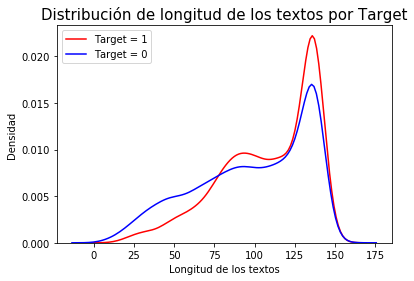

In [610]:
# hago un plot de la longitud de textos por target
plot = sns.distplot(merge_keyword_group_entrenamiento[merge_keyword_group_entrenamiento['target']== 1]['longitud_text'], color = 'red',hist=False, rug=False, label = 'Target = 1')
plot = sns.distplot(merge_keyword_group_entrenamiento[merge_keyword_group_entrenamiento['target']== 0]['longitud_text'], color = 'blue',hist=False, rug=False, label = 'Target = 0')

plot.set_title("Distribución de longitud de los textos por Target",size=15)
plot.set_xlabel('Longitud de los textos', size=10)
plot.set_ylabel('Densidad',size=10)
